# Analysis of travel dataset
This dataset was acquired from Kaggle and is a randomly generated list of data and **not** collected from real world sources.
[Dataset Credit: ](https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data)

**Goals:**
1. Setup and Imports
    - Will be using Pandas and numpy for handling data frames, other imports for graphs etc.,
2. Load the dataset
    - Into a pandas dataframe to have a look at it
3. Explore Data
    - Go through current dataframe do some exploratory analysis
    - Think about any feature creation which could be included?
4. Clean Data
    - Remove anything we dont require and tidy text where possible
5. Analysis of Data
    - Perform some analysis on dataset

## Setup

In [54]:
## Imports
import pandas as pd
import numpy as np

In [55]:
# load data to dataframe
file_path = "Travel details dataset.csv"
travel_data = pd.read_csv(file_path)

# check the dataframe is working
travel_data.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


## Exploratory Analysis

In [56]:
## check the last rows of data
travel_data.tail()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500
138,139,"Auckland, New Zealand",10/1/2023,10/8/2023,7.0,William Brown,39.0,Male,New Zealander,Hotel,7000,Train,2500


In [57]:
## check the size of the frame
travel_data.shape

(139, 13)

In [58]:
## data decription
travel_data.describe

<bound method NDFrame.describe of      Trip ID             Destination Start date   End date  Duration (days)  \
0          1              London, UK   5/1/2023   5/8/2023              7.0   
1          2        Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2          3         Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3          4           New York, USA  8/15/2023  8/29/2023             14.0   
4          5            Tokyo, Japan  9/10/2023  9/17/2023              7.0   
..       ...                     ...        ...        ...              ...   
134      135  Rio de Janeiro, Brazil   8/1/2023  8/10/2023              9.0   
135      136       Vancouver, Canada  8/15/2023  8/21/2023              6.0   
136      137       Bangkok, Thailand   9/1/2023   9/8/2023              7.0   
137      138        Barcelona, Spain  9/15/2023  9/22/2023              7.0   
138      139   Auckland, New Zealand  10/1/2023  10/8/2023              7.0   

       Traveler n

In [59]:
## check for null values
travel_data.isnull().sum()

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64

In [60]:
## check top 5 destinations
travel_data['Destination'].value_counts()[0:5]

Destination
Paris            7
Bali             7
Tokyo, Japan     7
Paris, France    7
Tokyo            5
Name: count, dtype: int64

In [61]:
## checking the top 5 nationalities
travel_data['Traveler nationality'].value_counts()[0:5]

Traveler nationality
American      24
Korean        13
British       12
Canadian       9
Australian     8
Name: count, dtype: int64

In [62]:
## checking accomadation cost as some of the values looked different when checking the csv
travel_data['Accommodation cost'].value_counts()[0:10]

Accommodation cost
1200       7
900        7
800        7
1000       6
1500       5
$500       5
$1,200     5
$600       4
500        4
$800       4
Name: count, dtype: int64

In [63]:
## check the transportation type to see if it needs tidying
travel_data['Transportation type'].unique()

array(['Flight', 'Train', 'Plane', 'Bus', 'Car rental', 'Subway', nan,
       'Car', 'Ferry', 'Airplane'], dtype=object)

## Clean Data
- Remove the few null values found in exploration
- keep consistency with the 'Accommodation cost' and 'Transport cost' fields as some values contain a dollar sign $ and some dont..
- Some duplicate / same destination names found when performing value counts i.e. destination = a. paris & b. paris, france => being different
- duplicate 'transportation' types such as 'airplane' 'plane' and 'flight' all meaning the same thing

In [64]:
# removing null values - happy to use dropna() as it only remvoes 3 rows
travel_data = travel_data.dropna()
travel_data.shape

(136, 13)

In [65]:
## get rid of dollar symbols and commas in the 'cost' fields and making sure its type int
travel_data['Accommodation cost'] = travel_data['Accommodation cost']\
                                    .str.replace('$','')\
                                    .str.replace(',','')\
                                    .str.replace(' ','')\
                                    .str.replace('USD','')\
                                    .astype(int)

# cehcking if this made a difference to the counts from earliers exploratory analysis
travel_data['Accommodation cost'].value_counts()[0:10]

C:\Users\jorda\AppData\Local\Temp\ipykernel_16448\2194180787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_data['Accommodation cost'] = travel_data['Accommodation cost']\


Accommodation cost
1200    14
800     14
900     13
1000    11
500     11
400     10
700      8
1500     8
600      7
300      4
Name: count, dtype: int64

In [66]:
## get rid of dollar symbols, comma, spaces and 'USD' text from the 'Travel cost' field
travel_data['Transportation cost'] = travel_data['Transportation cost']\
                                    .str.replace('$','')\
                                    .str.replace(',','')\
                                    .str.replace(' ','')\
                                    .str.replace('USD','')\
                                    .astype(int)

# cehcking if this made a difference to the counts from earliers exploratory analysis
travel_data['Transportation cost'].value_counts()[0:10]

C:\Users\jorda\AppData\Local\Temp\ipykernel_16448\3210725342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_data['Transportation cost'] = travel_data['Transportation cost']\


Transportation cost
800     16
700     15
500     11
150     11
100     10
200     10
600      9
300      9
1000     8
400      7
Name: count, dtype: int64

In [67]:
## tidying destination names using regular expression
# making a new column 'City' as I might add the country later and check by same destination > different city etc..,
travel_data['City'] = travel_data['Destination'].str.extract(r'(^[^,]+)', expand = False)
print(travel_data)

     Trip ID             Destination Start date   End date  Duration (days)  \
0          1              London, UK   5/1/2023   5/8/2023              7.0   
1          2        Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2          3         Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3          4           New York, USA  8/15/2023  8/29/2023             14.0   
4          5            Tokyo, Japan  9/10/2023  9/17/2023              7.0   
..       ...                     ...        ...        ...              ...   
134      135  Rio de Janeiro, Brazil   8/1/2023  8/10/2023              9.0   
135      136       Vancouver, Canada  8/15/2023  8/21/2023              6.0   
136      137       Bangkok, Thailand   9/1/2023   9/8/2023              7.0   
137      138        Barcelona, Spain  9/15/2023  9/22/2023              7.0   
138      139   Auckland, New Zealand  10/1/2023  10/8/2023              7.0   

       Traveler name  Traveler age Traveler gender 

C:\Users\jorda\AppData\Local\Temp\ipykernel_16448\3466460753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_data['City'] = travel_data['Destination'].str.extract(r'(^[^,]+)', expand = False)


In [68]:
## checking 'city exclusively
print(travel_data['City'])

0              London
1              Phuket
2                Bali
3            New York
4               Tokyo
            ...      
134    Rio de Janeiro
135         Vancouver
136           Bangkok
137         Barcelona
138          Auckland
Name: City, Length: 136, dtype: object


In [69]:
## tidying the 'Transportation type' column to have consistent values

# having issues altering the flight values using .replace so trying using a dictionary
replacements = {
    'Flight':'Airplane',
    'Plane':'Airplane'
}

# using .replace with the dictionary instead
travel_data['Transportation type'] = travel_data['Transportation type'].replace(replacements, regex = True)
travel_data['Transportation type'].unique()

C:\Users\jorda\AppData\Local\Temp\ipykernel_16448\2460966835.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_data['Transportation type'] = travel_data['Transportation type'].replace(replacements, regex = True)


array(['Airplane', 'Train', 'Bus', 'Car rental', 'Subway', 'Car', 'Ferry'],
      dtype=object)

### Saving clean data to a new csv to work from

In [70]:
# Saving cleaned data to CSV - commented out in case of rerun
#travel_data.to_csv('travel_details_dataset_cleaned.csv', index = False)

## Data Analysis
- General stats
- Average cost of accommodation and transportation
- Top cities that were visited
- Distribution of age
- Most common cities

In [71]:
# imports for analysis phase
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
# load data to dataframe
file_path = "travel_details_dataset_cleaned.csv"
travel_data = pd.read_csv(file_path)

# check the dataframe is working
travel_data.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Airplane,600,London
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Airplane,500,Phuket
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Airplane,700,Bali
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Airplane,1000,New York
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200,Tokyo


### Stats

In [73]:
# calculating the mean median and mode for the accommodation
mean_accommodation_cost = travel_data['Accommodation cost'].mean()
median_accommodation_cost = travel_data['Accommodation cost'].median()
mode_accommodation_cost = travel_data['Accommodation cost'].mode()

print("___ACCOMMODATION STATS___")
print("mean:", mean_accommodation_cost)
print("median:",median_accommodation_cost)
print("mode:",mode_accommodation_cost)

# and transportation costs
mean_transportation_cost = travel_data['Transportation cost'].mean()
median_transportation_cost = travel_data['Transportation cost'].median()
mode_transportation_cost = travel_data['Transportation cost'].mode()

print("___TRANSPORTATION STATS___")
print("mean:", mean_transportation_cost)
print("median:",median_transportation_cost)
print("mode:",mode_transportation_cost)

___ACCOMMODATION STATS___
mean: 1253.5294117647059
median: 900.0
mode: 0     800
1    1200
Name: Accommodation cost, dtype: int64
___TRANSPORTATION STATS___
mean: 645.1838235294117
median: 550.0
mode: 0    800
Name: Transportation cost, dtype: int64


### Average cost of accommodation and transportation

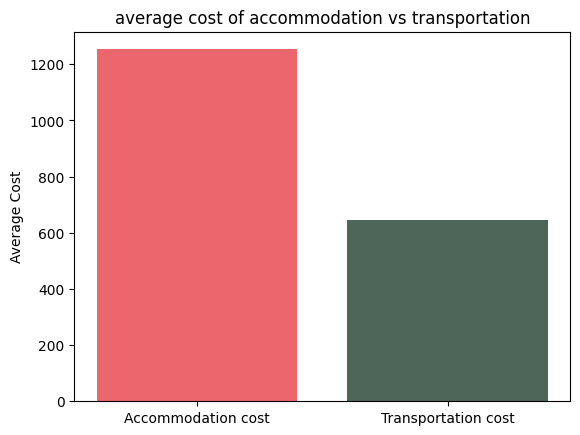

In [74]:
# using the mean to show averages of accom and transport costs
categories = ['Accommodation cost','Transportation cost']
mean_costs = [mean_accommodation_cost, mean_transportation_cost]

# creating bar plt
plt.bar(categories, mean_costs, color=['#eb676d','#4e6659'])
plt.title('average cost of accommodation vs transportation')
plt.ylabel('Average Cost')
plt.show()

### Top Cities

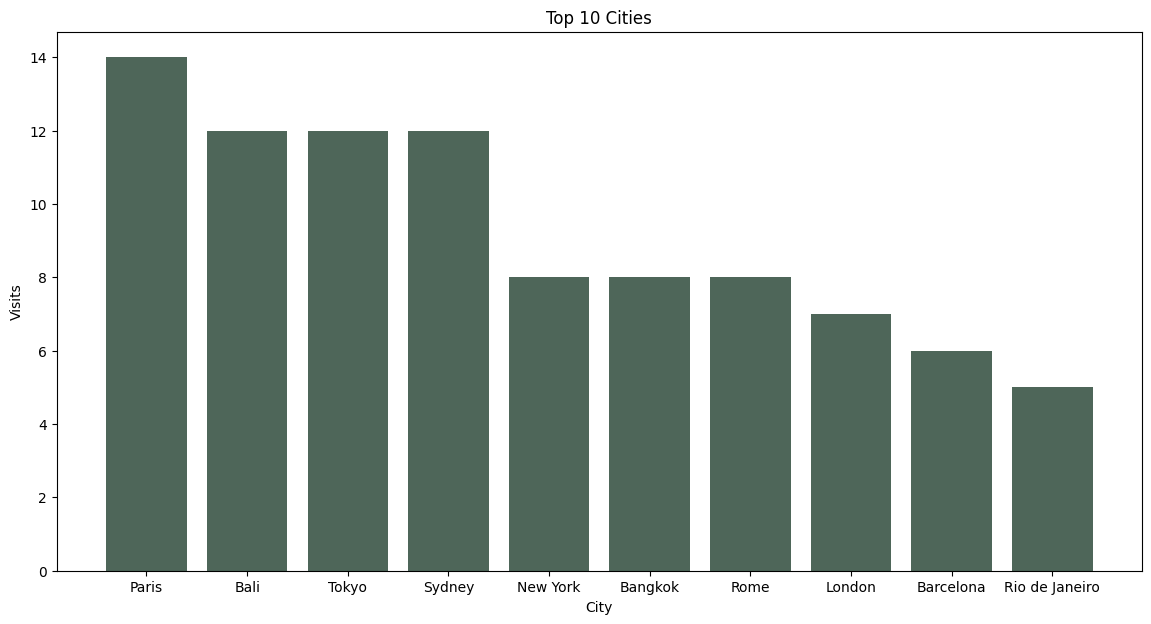

In [75]:
# getting counts for top cities, using value_counts()
city_count = travel_data['City'].value_counts().head(10)

# plot for top city counts
plt.figure(figsize=(14, 7))
plt.bar(city_count.index, city_count.values, color='#4e6659')
plt.title('Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Visits')
plt.show()


### Distribution of age


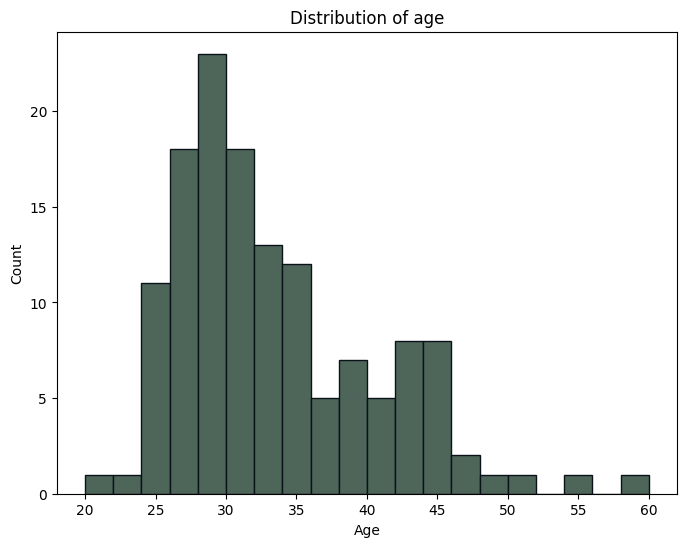

In [76]:
plt.figure(figsize=(8,6))

plt.hist(travel_data['Traveler age'], bins=20, color='#4e6659', edgecolor='#0b1119')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Accommodation vs City

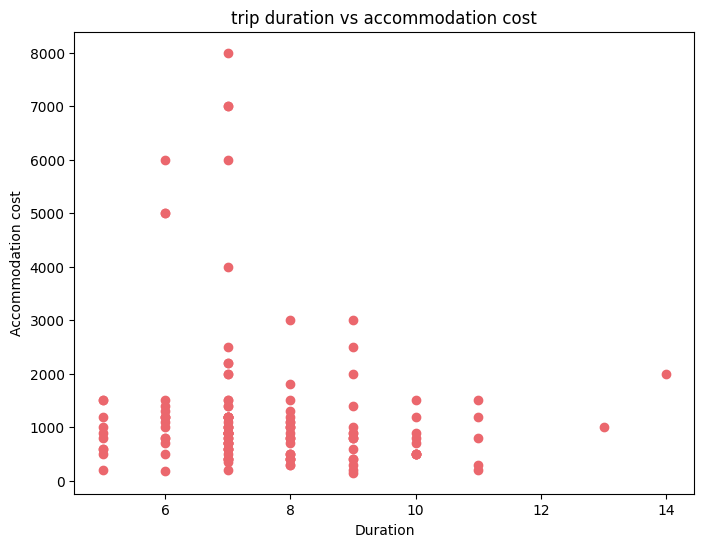

In [77]:
# scatter plot for duration vs cost of accommodation
plt.figure(figsize=(8,6))

plt.scatter(travel_data['Duration (days)'], travel_data['Accommodation cost'], color='#eb676d')
plt.title('trip duration vs accommodation cost')
plt.xlabel('Duration')
plt.ylabel('Accommodation cost')
plt.show()



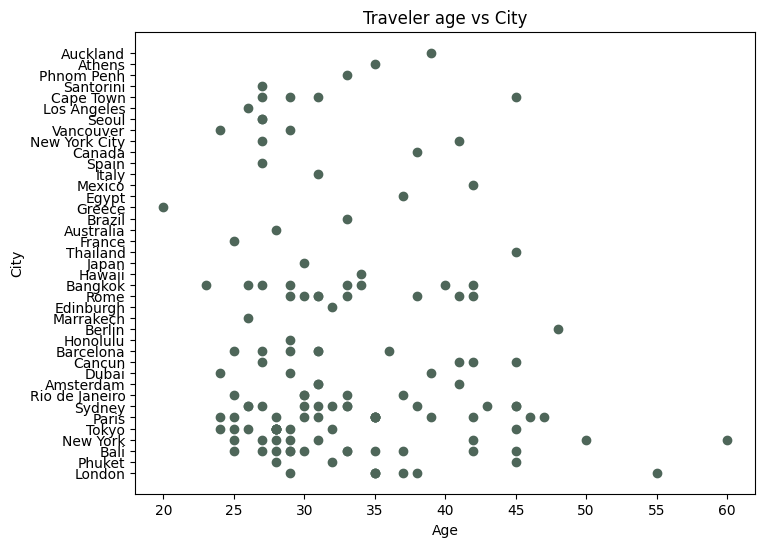

In [78]:
# scatter plot for duration vs cost of accommodation
plt.figure(figsize=(8,6))

plt.scatter(travel_data['Traveler age'], travel_data['City'], color='#4e6659')
plt.title('Traveler age vs City')
plt.xlabel('Age')
plt.ylabel('City')
plt.show()

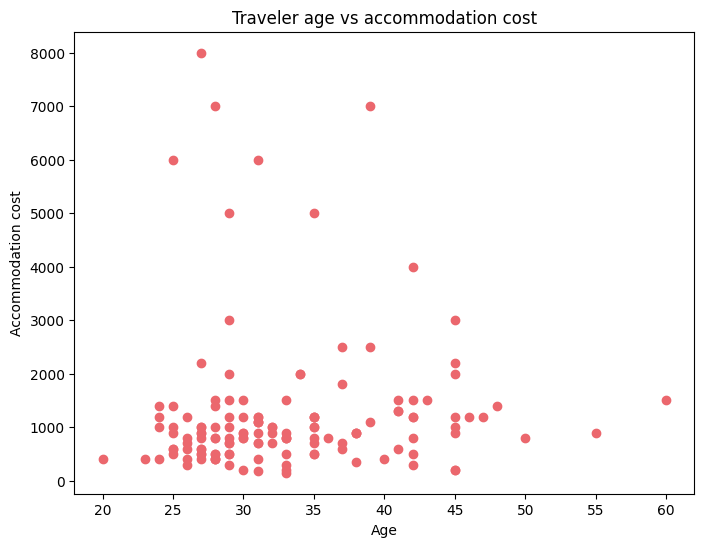

In [79]:
# scatter plot for age vs city
plt.figure(figsize=(8,6))

plt.scatter(travel_data['Traveler age'], travel_data['Accommodation cost'], color='#eb676d')
plt.title('Traveler age vs accommodation cost')
plt.xlabel('Age')
plt.ylabel('Accommodation cost')
plt.show()